# Testing displacement estimates using correlation between two images
### Import some libs

In [2]:
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt


## Load the data

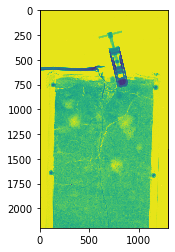

In [3]:
img = plt.imread('2_S_day5.jpg');
plt.imshow(img)

Locating a small ROI around a screw

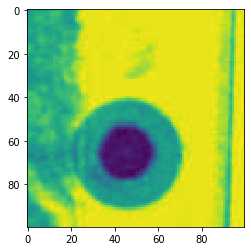

In [6]:
plt.imshow(img[1600:1700,1100:1200])

## Making two ROI images
Extracting two images with a displacement of $d_{row}$=50 and $d_{col}$=10 and showing the result.

(<matplotlib.axes._subplots.AxesSubplot at 0x7ffe58dee668>,
 <matplotlib.image.AxesImage at 0x7ffe40354400>)

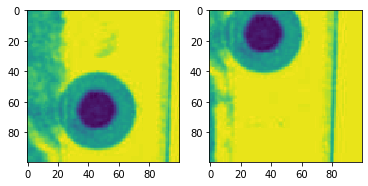

In [11]:
a=img[1600:1700,1100:1200]
b=img[1650:1750,1110:1210]
plt.subplot(1,2,1), plt.imshow(a)
plt.subplot(1,2,2), plt.imshow(b)

## Correlation calculation
- Compute the 2D FFT of the two images (they have to be the same size)
- Compute $\mathcal{F}\{corr\}=\mathcal{F}\{a\} * \mathcal{F}\{b\}^*$
- Compute corr=$|\mathcal{F}^{-1}\{\mathcal{F}\{corr\}\}|$

In [21]:
fa=np.fft.fft2(a);
fb=np.fft.fft2(b);

f=fa*np.conjugate(fb);
co=np.abs(np.fft.ifft2(f));

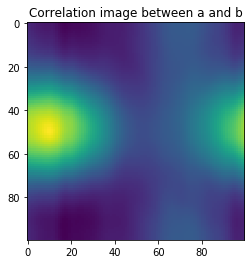

In [22]:
plt.imshow(np.abs(co))
plt.title('Correlation image between a and b');

## Find the displacement
Locate the max location in $corr$.

In [23]:
pos = np.where(co == np.amax(co))

In [24]:
pos

(array([49]), array([10]))

This is a pretty coarse way to find the local max that could be improved, but is what I could provide as Friday afternoon playing :-)

Ideally, you should probably also do fft shift to center the peak in the middle.